In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Lotka-Volterra 1

**Si vuole studiare l’andamento della popolazione di volpi e conigli in un tratto di campagna britannica.**

Si ipotizza che l’andamento delle due popolazioni sia modellabile mediante le equazioni di Lotka-Volterra, un classico modello preda-predatore continuo. Il modello è definito dalle due equazioni differenziali:

$$\begin{align}
\dot{r} = \alpha r - \beta r f \\
\dot{f} = \delta r f - \gamma f
\end{align}$$

Dove $r$ è il numero di conigli, $f$ è il numero di volpi e:

* $\alpha$ è il tasso naturale di crescita della popolazione di conigli
* $\beta$ è il tasso di predazione dei conigli da parte delle volpi
* $\delta$ è il “bonus” riproduttivo per le volpi in base alla predazione
* $\gamma$ è il tasso di decadimento naturale della popolazione di volpi

Tutti i parametri del modello sono calcolati avendo come _unità di misurate temporale un mese_.

## Esercizio 1

**Nel modulo `sol.lv` definire la funzione**

```python
def dstate(X, t=0):
    # Parametri fissi
    a = 0.2 # Tasso di crescita della popolazione di conigli
    b = 0.0006 # Tasso di predazione
    d = 0.00004 # Bonus riproduttivo per predazione
    g = 0.1 # Tasso di calo della popolazione di volpi
    ...
```

* La funzione deve calcolare le espressioni che definiscono l'ODE
* Diversi parametri (come indicato) saranno considerati fissi nell'esercizio
* La funzione deve restituire un array `numpy` con le due componenti della derivata


**Nel modulo `sol.lv` si definisca quindi la funzione:**

```python
def simulate():
    x0 = [2000, 200]
    t = np.linspace(0, 12*10, 12*10*10)
    ...
```

* La funzione deve risolvere un problema ai valori iniziali
* ...Con lo stato iniziale ed il vettorei dei tempi indicati (10 anni)
* Il metodo deve restituire
  - La matrice con gli stati visitati
  - Il vettore dei tempi visitati

Si collaudi la funzione nella cella seguente. Per verificare la correttezza dei risultati, può essere utile disegnare l'andamento dello stato usando la funzione `plot_state_evolution` nel modulo `base.util` incluso nel tema d'esame.

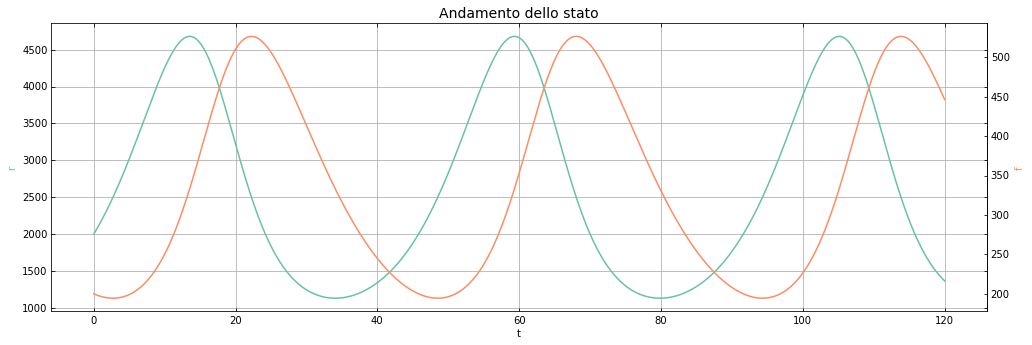

In [2]:
from sol import lv
from base import util

X, t = lv.simulate()
util.plot_state_evolution(X, t, xlabel='t', ylabels=['r', 'f'], figsize=(20, 5), title='Andamento dello stato')

## Esercizio 2

In corrispondenza di un punto di equilibrio, tutte le derivate di un sistema dinamico tempo continuo devono annullarsi. Quindi, per i punti di equilibrio del modello di Lotka-Volterra deve valere l’equazione:

$$\begin{align}
\alpha r - \beta r f = 0\\
\delta r f - \gamma f = 0
\end{align}$$

Si noti che le due espressioni da annullare sono _le due derivata calcolate da `dstate`_.

Il modello ha sempre un punto di equilibrio quando entrambe le popolazioni sono nulle, più un secondo punto di equilibrio non banale.

**Nel modulo `sol.lv` si definisca la funzione:**

```python
def find_eq():
    x0 = [2000, 200]
    ...
```

* La funzione deve determinare un punto di equilibrio per il sistema
* Si utilizzi il metodo `scipy.optimize.fsolve` per risolvere il sistema di equazioni
* Si utilizzi come stima iniziare il valore indicato nel codice
* Sia $f(X)$ la funzione di cui si desidera individuare uno zero
  - Se $max(|f(X)|) < 10^{-6}$ deve essere restituita la soluzione
  - In caso contrario, deve essere restituito `None`

In [3]:
res = lv.find_eq()
if res is None:
    print('Nessuna soluzione trovata')
else:
    print(f'conigli: {res[0]}, volpi: {res[1]}')

conigli: 2500.0, volpi: 333.33333333333337


## Esercizio 3

**È possibile deteminare quali valori dovrebbero avere i due parametri $\beta$ e $\delta$ perché all'equilibrio $r$ ed $f$ abbiano valori prestabiliti**

A tal scopo, è necessario risolvere il sistema:

$$\begin{align}
\alpha r - \beta r f = 0\\
\delta r f - \gamma f = 0
\end{align}$$

...In cui $r$ ed $f$ sono noti, mentre le variabili sono $\beta$ e $\delta$

**Nel modulo `sol.lv` si definisca la funzione:**

```python
def find_params_aux(X):
    # Parametri fissi
    a = 0.2 # Tasso di crescita della popolazione di conigli
    g = 0.1 # Tasso di calo della popolazione di volpi
    r = 2500 # Numero di conigli all'equilibrio
    f = 400 # Numero di volpi all'equilibrio
    ...
```

* La funzione deve calcolare la due espressioni da azzerare nel sistema appena descritto
* Il parametro di ingresso $X$ rappresentea la coppia $(\beta, \delta)$
* La funzione deve restituire le due espressioni come array di `numpy`


**Nel modulo `sol.lv` si definisca la funzione:**

```python
def find_params():
    x0 = [0.0006, 0.00004]
    ...
```

* La funzione deve determinare il valore dei parametri $\beta$ e $\delta$ perché le popolazioni all'equilibrio siano quelle specificate in `find_params_aux`
* Si utilizzi il metodo `scipy.optimize.fsolve` per risolvere il sistema di equazioni
* Si utilizzi come stima iniziare il valore indicato nel codice
* Sia $f(X)$ la funzione di cui si desidera individuare uno zero
  - Se $max(|f(X)|) < 10^{-6}$ deve essere restituita la soluzione
  - In caso contrario, deve essere restituito `None`

In [4]:
res = lv.find_params()
if res is None:
    print('Nessuna soluzione trovata')
else:
    print(f'beta: {res[0]}, delta: {res[1]}')

beta: 0.0005, delta: 4e-05
